# Labor 03: Logisztikus regresszió:
### Egyetemi felvételi:

Ebben a feladatban logisztikus regressziót fogunk használni, hogy megjósoljuk egy adott hallgató felvételének tényét az egyetemre.

Tegyük fel, hogy egyetemi adminisztrátorok vagyunk és meg szeretnénk határozni,  egy adott jelentkezőnek az esélyét a sikeres felvételire a két felvételi teszt eredménye alapján. Rendelkezésünkre állnak az eddigi eredmények címkézve, hogy az adott hallgató jelentkezése sikeres volt vagy nem.

Ezt az adathallmazt tudjuk használni a logisztikus regressziónkra.

### 1: Importáljuk be a megfelelő csomagokat:
Szükségünk lesz:
- NumPy
- MatPlotLib pyplopt csomagjára
- Pandas csomagot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2: Olvassuk be az adatainkat!

In [3]:
data = pd.read_csv('Lab3data.txt', header = None).to_numpy()       # adatok beolvasása majd NumPy tömbbé alakítása
X = data[:,0:2]                                                    # X rendezése
m,n = X.shape                                                      # m adatok száma / n feature-k száma
Y = data[:,2].reshape(m,1)                                         # Y rendezése
del data                                                           # felesleges változó törlése

print('X:', X.shape)                    # adattömbök méretének / adatok számának / feature-k számának kiírása
print('Y:', Y.shape)
print('Adatok száma:',m)
print('Feature-ök száma:',n)

X: (100, 2)
Y: (100, 1)
Adatok száma: 100
Feature-ök száma: 2


### 3: Jelenítsük meg az adatainkat!

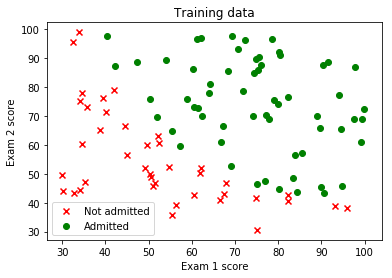

In [5]:
def plotData(X,Y):
    pos=[]                                                  # felvettek
    neg=[]                                                  # elutasítottak

    for i in range(0,Y.size):                               # Y alapján végignézzük, hogy felvették e az illetőt
        if Y[i] ==0:                                        # ha nem akkor X adott elemei a neg -be mennek
            neg.append(X[i,:])
        elif Y[i] ==1:                                      # ha igen akkor X adott elemei a pos -ba mennek
            pos.append(X[i,:])

    neg = np.array(neg)                                     # neg -> NumPy tömb
    pos = np.array(pos)                                     # pos -> NumPy tömb

    plt.scatter(neg[:,0],neg[:,1],marker='x',c="r", label="Not admitted")   # nem felvettek kirakzolása, x-el, pirosan
    plt.scatter(pos[:,0],pos[:,1],marker='o',c="g", label="Admitted")       # felvettek kirajzolása, körrel, zölddel
    plt.title("Training data")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(loc='lower left')
    plt.show()

    return pos, neg                                          # két lista visszaadása

pos,neg=plotData(X,Y)

Láthatjuk, hogy a két kategória elválasztható megközelítőleg egy egyenessel.

## 4: Bias hozzáadása az X mátrixhoz:
Ahogy már az előzőekben is csináltuk hozzáadunk egy egyesekből álló oszlopot az X mátrixhoz, hogy a tengelymetszet megmaradjon a hipotézisünkben (Lásd. L01 - L02).

In [6]:
if (X.shape[1]==n):                             # ha még nem végeztük el a biaszolást (X - mxn)
    X=np.column_stack((np.ones((m,1)),X))       # bias
print(X.shape)                                  # visszaellenőrizésnek kiírjuk a mátrix méreteit

(100, 3)


## 5: A model:

Mivel osztályozási, vagyis klasszifikációs problémával állunk szemben az eddigi lineáris regressziós modellünk nem lesz teljesen megfelelő. Nézzünk egy egyszerű példát. Tumor méret alapján próbáljuk eldönteni, hogy a daganat halálos vagy nem.

<img src="files/Pics/L03_Tumor.png" width="400">

Ha az eddig bevezetett módszert alkalmazzuk és a

$ h_w(x)=XW $ 

hipotézist használva illesztünk egy egyenest. Az egyenesünk viszont túllövi a korlátos [0,1] halmazt és nem is elég pontos. Elnanyoltan illesztett egyenesünkre ez után egy határértéket definiálva, legyen ez 0.5, el tudjuk dönteni, hogy mi lesz a predikciónk.

Ha $h_w(x)\geq 0.5$, akkor "y=1", vagyis halálos. <br>
Ha $h_w(x)< 0.5$, akkor "y=0", vagyis nem halálos.  <br>

A predikciónk viszont eshet 0 alá vagy 1 fölé, ami felesleges. Jobb lenne találni egy korlátos hipotézis függvényt,ami teljesíti, hogy:

$0\leq h_w(x) \leq 1$

Vezessük be a sigmoid függvényt, mely függvény teljesíti ezt a kritériumot, miszerint korlátos [0,1] tartományon.

Szigmoid:

$ g(z) = \frac{1}{1+e^{-z}} $

<img src= "files\Pics\sigmoid.png" width=450>

A szigmoid függvény segítségével gyakorlatilag egy valószínűséget rendelünk minden egyes mintához, hogy mekkora annak az esélye, hogy halálos az a méretű tumor. 

$h_w(x)=P(y=1|X, W)$

A hipotézisünket pedig az almábbi módon bővíthetjük: <br>

$ h_w(x) = g(XW) $ , ahol $ g(XW) = \frac{1}{1+e^{-XW}} $


Hozzuk létre a sigmoid nevű függvényt, majd teszteljük is az eredményt -6, 0, 6 értékekre!

In [18]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))                               # szigmoid függvény értékének visszaadása

print('Függvény érték -6 bemenőértékre %.3f' % sigmoid(-6))          # teszt -6 -ra
print('Függvény érték 0 bemenőértékre %.3f' % sigmoid(0))            # teszt 0 -ra
print('Függvény érték 6 bemenőértékre %.3f' % sigmoid(6))            # teszt 6 -ra 

if sigmoid(-6) < 0.01 and sigmoid(0) == 0.5 and sigmoid(6) > 0.99:
    print("\n A sigmoid() függvény megfelelő. Tovább mehet.")
else:
    print("\n Valami nem stimmel. Korrekció szükséges!")

Függvény érték -6 bemenőértékre 0.002
Függvény érték 0 bemenőértékre 0.500
Függvény érték 6 bemenőértékre 0.998

 A sigmoid() függvény megfelelő. Tovább mehet.


### 6 A költségfüggvény:
Mivel változtattunk a hipotézis függvényünkkön az eddig használt költség függvényünkön is módosítanunk kell. A feladathoz igazítani. Korábbi példáink során megfelelően sima konvergenciát biztosított, a módosított hipotézisünkkel azonban sokkal nehezebb lenne a konvergencia. A kérdés az, tudunk-e találni egy olyan költség függvényt, amely osztályozási feladatok során konvex költség függvényt tud definiálni? Konvex függvényen a a gradiens módszerünk sokkal kisebb valószínűséggel fog beragadni lokális minimum pontba.

<img src="files\Pics\L03_Costfunction.png" width=600>


Tehát a költségfüggvényként használjuk az alábbi összefüggést:

$ C(w) = -\frac{1}{m} \sum{y^i\cdot\log(h_w(x^i))-(1-y^i)\cdot\log(1-h_w(x^i))} $


### 7: A gárdiens függvény:
A költségfüggvényt lederiválva itt is a grádiens függvényét kapjuk:
$grad = \frac{X^T \cdot (h_w(X)-Y)}{m}$



### costFunction definiálása:
Írjuk meg a costFunction definícióját, majd teszteljük le két w értékkel!\
Az inital_w legyen [0; 0; 0], míg test_w legyen [-24; 0.2; 0.2]!

In [18]:
def costFunction(w,X,Y):
    prediction = np.array(sigmoid(X@w))                                     # predikció kiszámítása (részszámítás) 
    error = ((-Y) * np.log(prediction)) - ((1-Y)*(np.log(1-prediction)))    # hiba kiszámítása (résszámítás)
    C = (1/m) * np.sum(error)                                               # költségfüggvény kiszámítása

    grad = (X.transpose())@(prediction-Y)/m                                 # költségfüggvény értéke

    return C, grad                                                          # eredmények visszaadása

initial_w = np.zeros(((n+1),1))                                             # kezdeti súlyok (null vektor) létrehozása
C,grad = costFunction(initial_w,X,Y)                                        # költségfüggvény tesztelése 1

print('''Cost and Gradient  at initial weights (zeros):
Expected cost (approx.): 0.693
Computed:''',C)
print('''Expected gradient(approx.):
 [[-0.1]
 [-12.0092]
 [-11.2628]]
Computed:\n''',grad)

test_w = np.array([[-24], [0.2], [0.2]])                                    # teszt súlyok létrehozása [-24;0.2;0.2]
C, grad = costFunction(test_w,X,Y)                                          # költségfüggvény tesztelése 2
print('\nTest weights:',test_w.transpose())
print('''Cost and Gradient  at test weights:
Expected cost (approx.): 0.218
Computed:''',C)
print('''Expected gradient(approx.):
 [[0.043]
 [2.566]
 [2.647]]
Computed:\n''',grad)
print('\n')

Cost and Gradient  at initial weights (zeros):
Expected cost (approx.): 0.693
Computed: 0.6931471805599453
Expected gradient(approx.):
 [[-0.1]
 [-12.0092]
 [-11.2628]]
Computed:
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]

Test weights: [[-24.    0.2   0.2]]
Cost and Gradient  at test weights:
Expected cost (approx.): 0.218
Computed: 0.21833019382659785
Expected gradient(approx.):
 [[0.043]
 [2.566]
 [2.647]]
Computed:
 [[0.04290299]
 [2.56623412]
 [2.64679737]]




### 7: Feature normalization:
Ahogy az előzőekben itt is ajánlott a normalizálás. (Lásd L02 - 2)

In [19]:
def featureNormalization(X):
    mean = np.mean(X,axis=0)                                    # X oszlopainak átlagai
    std = np.std(X, axis=0,ddof=1)                              # X oszlopainak szórásai (korrigált tapasztalati)
    X_temp = X.copy()                                           # biasolás tesztelésére egy temp változó

    if std[0] == 0:                                             # tesztelés (tiszta 1-es oszlop szórása 0)
        X_temp=np.delete(X_temp,0,1)                            # ha van biasolva az X mátrix, akkor kivesszük az első
        X_norm = (X_temp - mean[1:3]) / std[1:3]                # tiszta 1-es oszlopot, elvégezzük a normalizálást és
        X_norm=np.column_stack((np.ones((m,1)),X_norm))         # visszaadjuk a tiszta 1-es oszlopot
    else:
        X_norm = (X_temp - mean) / std                          # a nem volt, akkor csak elvégezzük a normalizálást

    return X_norm,mean,std                                      # visszaadjuk a normalizált X-et, átlagot, szórást

X_norm,mean,std=featureNormalization(X)                         # el is végezzük a normalizálást

### 8: Grádiens módszer definiálása:

In [20]:
def gradientDescent(X,Y,w,alpha,num_iters=400):
    C_history = []                                      # C_history változó létrehozása

    for i in range(num_iters):                          # epoch számig folytatjuk a grádiens módszert
        C, grad = costFunction(w,X,Y)                   # költségfüggvény értékének / grádiens meghatározása
        w = w - (alpha*grad)                            # új súlyok beállítása
        C_history.append(C)                             # költségfüggvény történet bővítése

    return w, np.array(C_history)                       # visszaadjuk a számolt súlyokat és a kötlségfüggvény történetet

### 9: Grádiens módszer kirpóbálása több tanulási rátára:

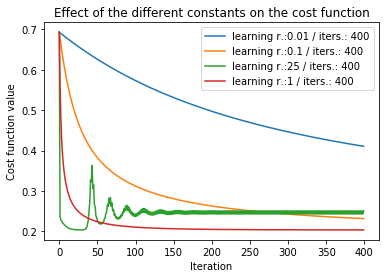

In [30]:
w = np.array([[0],[0],[0]])                                                         # kezdeti súlyok (0;0;0)
w, C_history = gradientDescent(X_norm,Y,w,0.01)                                     # gradiens módszer 0.01 tanulási ráta
plt.plot(range(C_history.size), C_history, label= "learning r.:0.01 / iters.: 400")

w = np.array([[0],[0],[0]])                                                         # kezdeti súlyok (0;0;0)
w, C_history = gradientDescent(X_norm,Y,w,0.1)                                      # gradiens módszer 0.1 tanulási ráta
plt.plot(range(C_history.size), C_history, label= "learning r.:0.1 / iters.: 400")

w = np.array([[0],[0],[0]])                                                         # kezdeti súlyok (0;0;0)
w, C_history = gradientDescent(X_norm,Y,w,25)                                        # gradiens módszer 25 tanulási ráta
plt.plot(range(C_history.size), C_history, label= "learning r.:25 / iters.: 400")    # kirajzolás mind a három esetre

w = np.array([[0],[0],[0]])                                                         # kezdeti súlyok (0;0;0)
w, C_history = gradientDescent(X_norm,Y,w,1)                                        # gradiens módszer 1 tanulási ráta
plt.plot(range(C_history.size), C_history, label= "learning r.:1 / iters.: 400")    # kirajzolás mind a három esetre

plt.title("Effect of the different constants on the cost function")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.legend()
plt.show()

A fenti ábrán láthatjuk, hogy a tanulási ráta miként befolyásolta az eredményünket:\
A 0.01 tanulási rátáról elmondhatjuk, hogy nem megfelelő, túlságosan is "félénk", ezért meg sem közelíti akár a sokkal jobb 0.1 -es értékkel vett tanulási ráta eredményét, akár az 1-est. Érdemes még egy kis figyelmet szentelnünk a nagyon is "bátor" 25 -ös értékre, ami mellett, mint láthatjuk, szintén nem sikerült megtalálnunk az "arany középutat" az ilyenkor fellépő osszcilláció tipikusan a nagy tanulási ráta eredménye. Elmondhatjuk tehát, hogy jelen esetünkben az 1-es értékű tanulási ráta egy jó közelítés.

In [33]:
print('''The cost function at found weights by the gradient descent alg.:
Expected (approx): 0.203
Computed: ''', C_history[-1])
print('''Weights expected (approx.):
[1.658 3.883 3.619]
Weights computed:\n''', w.transpose())

The cost function at found weights by the gradient descent alg.:
Expected (approx): 0.203
Computed:  0.2036051057163244
Weights expected (approx.):
[1.658 3.883 3.619]
Weights computed:
 [[1.6582185  3.88371249 3.61890756]]


### 9: Kirajzoljuk a döntési határt

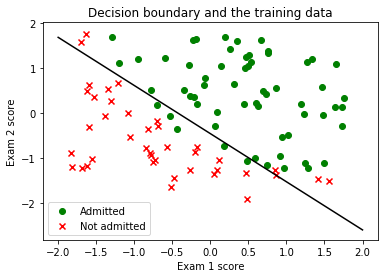

In [39]:
pos_norm=(pos-mean[1:3])/std[1:3]                                               # normalizáljuk a pos értékeit
neg_norm=(neg-mean[1:3])/std[1:3]                                               # normalizáljuk a neg értékeit

plt.scatter(pos_norm[:,0],pos_norm[:,1],c="g", marker="o",label="Admitted")     # pos kirajzolása, körökkel, zölddel
plt.scatter(neg_norm[:,0],neg_norm[:,1],c="r",marker="x",label="Not admitted")  # neg kirajzolása, x-ekkel, pirossal
x_value = np.array([-2,2])                                  # döntési határhoz felvesszünk két x értéket
y_value = -(w[0]+w[1]*x_value)/w[2]                         # kiszámoljuk a hozzájuk tartozó y -t
plt.plot(x_value,y_value,"k")                               # feketével felrajzoljuk a döntési határt
plt.title("Decision boundary and the training data")        
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show()

### 10: Előrejelzés:

In [41]:
def predictionMaking(X):                                    # predikciós függvény
    X = (X-mean[1:3])/std[1:3]                              # a beadott eredmények normalizálása
    X = np.append(np.ones((1)),X)                           # bias
    return sigmoid(X@w)                                     # h= sigmoid(Xw)

prediction=predictionMaking(np.array([45,85]))              # eredmény 45 és 85 pontra
print('''Expected result of the prediction with [45 , 85] (approx.):
0.767
Calculated:\n''',prediction)

Expected result of the prediction with [45 , 85] (approx.):
0.767
Calculated:
 [0.76758143]


### 11: Pontosság:

In [46]:
def calculateAccuracy(w,X,Y):                               # pontosság függvény
    predictions= (sigmoid(X@w)>0.5)                         # minden eredeti X-re kiszámoljuk a predikciót
    percentage=(sum(predictions==Y)/m)*100                  # ha nagyobb, mint 0.5 akkor pos ellenkező esetben neg
    return percentage                                       # összehasonlítjuk az Y elemeivel az eredményt és százalékot
                                                            # számolunk, ami tükrözi a pontosságot

print(float(calculateAccuracy(w,X_norm,Y)), '% accuracy (approx. 89.0 % expected)')

89.0 % accuracy (approx. 89.0 % expected)


## Fejlettebb csomagokkal

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt                         

data = pd.read_csv('Lab3data.txt', header = None)       # adatok beolvasása
XX = data.iloc[:, 0:2].values.reshape(-1, 2)            # adatok szétválogatása
YY = data.iloc[:, 2].values.reshape(-1,)                # adatok szétválogatása (LogReg fit-je egy 1d tömböt vár!)

logReg = LogisticRegression().fit(XX,YY)
test = np.array([[45, 85]])                             # mivel egy mintánk van ezért (1,2) array kell ezért a dupla []
pred = logReg.predict(test)                             # sima predikció
pred_p = logReg.predict_proba(test)                     # a teszteset valszínűségi predikciója

print("""Prediction for the approval:""",int(pred),"""
The value of the probability:""",pred_p[0,1])

acc = logReg.score(XX,YY)                               # pontosság kiszámolása 
print('Accuracy on the training data:',acc)

Prediction for the approval: 1 
The value of the probability: 0.7752856046030867
Accuracy on the training data: 0.89
